In [29]:
import analysis
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sg

%matplotlib inline

In [47]:
data_path = '/media/labrat/395Mount/FSL_work/SH/SH_031_04192017_EDITS.txt'

In [48]:
meants_path = '/media/labrat/395Mount/FSL_work/SH_all/SH031/BOLD/meants.txt'

In [49]:
data = pd.read_csv(data_path, sep='\t|,', names=['Time', 'O2', 'CO2'],
                 usecols=['Time', 'O2', 'CO2'], index_col=False)[['Time', 'O2', 'CO2']]
filtered_O2 = analysis.fourier_filter(data.Time, data.O2, 3,35,1.5)
filtered_CO2 = analysis.fourier_filter(data.Time, data.CO2, 3,35,1.5)

/home/labrat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [58]:
 meants = np.loadtxt(meants_path,delimiter='\n')
print(len(meants))

320


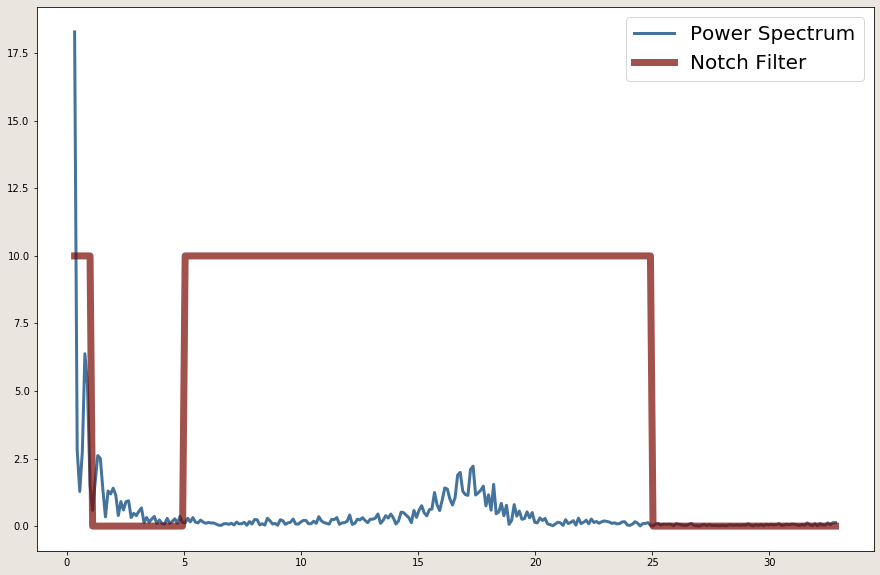

In [88]:
f,_,displayable_O2 = analysis.fourier_trans(data.Time[1], data.O2)

notch = []
for freq in f[3:300]:
    if(freq < 1 or (freq >= 5 and freq <= 25)):
        notch.append(10)
    else:
        notch.append(0)
    

plt.figure(figsize=(15,10), facecolor=(235/256,231/256,224/256,1))
plt.plot(f[3:300], displayable_O2[3:300], linewidth = 3, label = "Power Spectrum", color=(68/256,116/256,157/256,1))
plt.plot(f[3:300], notch, linewidth = 7, label = "Notch Filter", color=(121/256,8/256,0/256,.7))
plt.legend(prop={'size': 20})
plt.savefig("example_ffA.png")


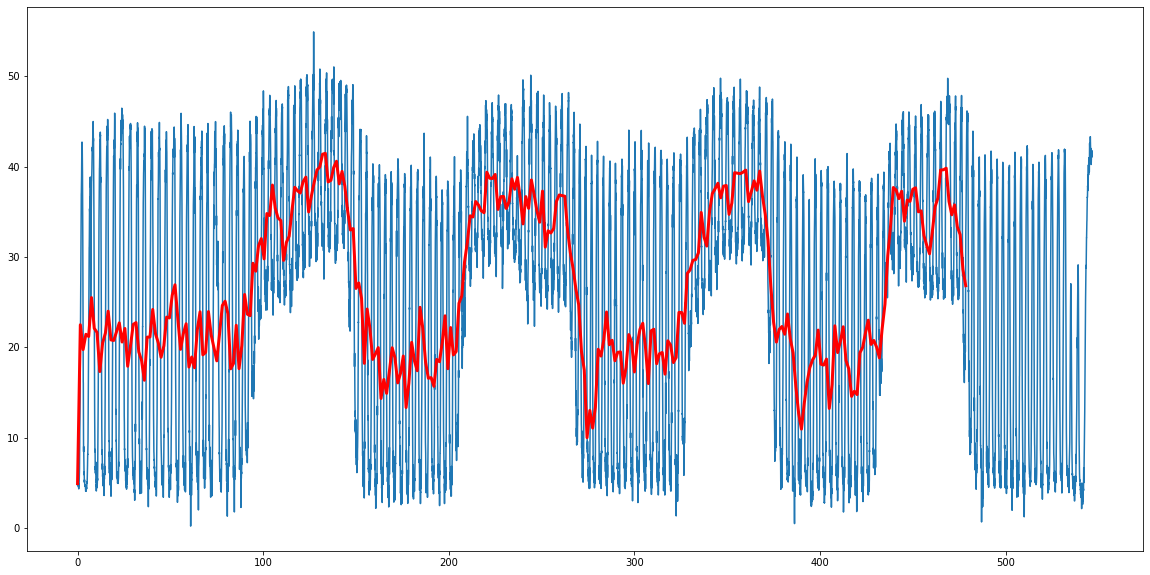

In [62]:
plt.figure(figsize=(20,10))
plt.plot(data.Time*60, data.CO2)
# print(data.Time)
time = np.arange(0,480,1.5)
plt.plot(time, filtered_CO2, color='red', linewidth = 3)
# plt.plot(np.linspace(0,data.Time[len(data.Time)-1], 320),np.loadtxt('/media/labrat/395Mount/replicate_attempt1/SH_024_03292017_EDITS_CO2.contrast'), linewidth = 5)
plt.show()

In [52]:
np.savetxt("/media/labrat/395Mount/FSL_work/Pass/O2.contrast", filtered_O2, delimiter='\n')

np.savetxt("/media/labrat/395Mount/FSL_work/Pass/CO2.contrast", filtered_CO2, delimiter='\n')

In [53]:
print(filtered_CO2)

[ 4.91667408 22.50025482 19.75592718 21.44924623 21.20319697 25.51397751
 22.10980026 21.64104459 17.32314166 20.48770498 21.58118828 24.00336213
 20.82386164 20.76154859 21.71944912 22.71211077 20.59083467 22.09396463
 17.90859515 20.13803619 22.54049417 22.74146728 19.48946248 18.53368021
 16.35789926 21.1328483  21.14106002 24.19678437 21.49381034 20.49838631
 18.90404125 20.1707611  23.34945144 23.25832708 25.77109036 26.92565799
 23.23488692 19.7814409  21.53006949 22.61196875 17.8192185  18.92971181
 17.74147242 21.9209941  23.9330901  19.17100398 19.43950836 23.96056321
 21.37712162 19.9321399  18.50726301 21.49399294 24.6325142  25.10707389
 23.71902761 17.62587791 18.21166017 22.4433988  17.64258996 20.20056519
 25.85581592 23.66984074 23.50930948 29.30911488 28.43197948 31.24204185
 32.03999819 29.79260577 34.81509862 34.59514027 37.96709378 35.42751165
 34.33011629 34.03607342 29.62386347 31.61483022 32.30669791 35.10801697
 37.72053731 37.33761467 37.09034821 38.34267264 38

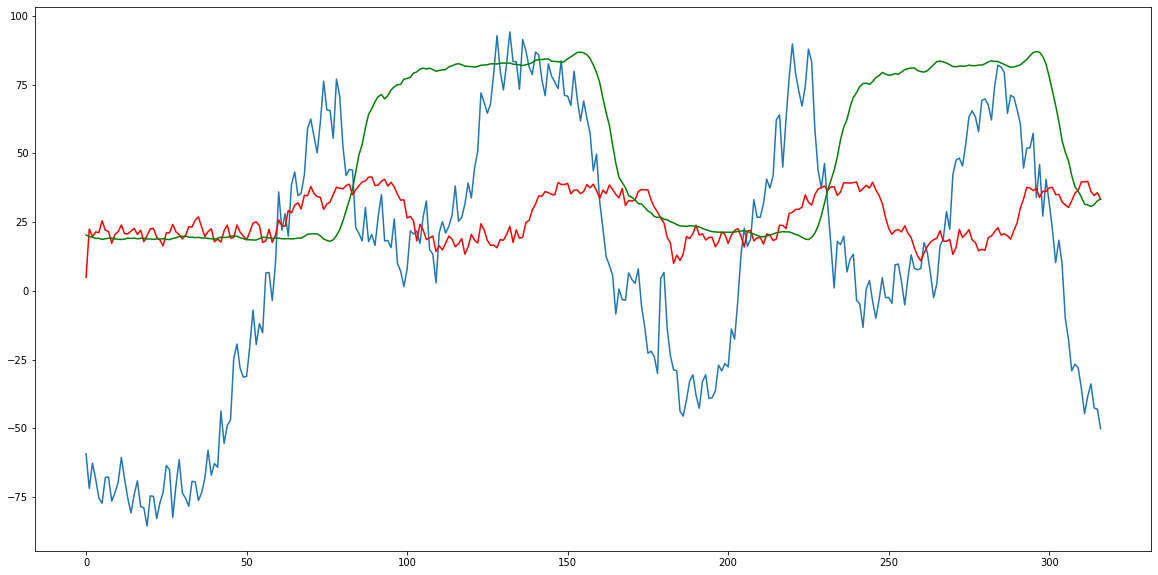

In [57]:
plt.figure(figsize=(20,10))
plt.plot((meants[3:]-350)*10)
plt.plot(filtered_CO2[:len(meants[3:])], color='red')
plt.plot(filtered_O2[:len(meants[3:])], color='green')